

# Project: TMDB Movies Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


>I have chosen the TMDB movies dataset for my analysis. The dataset consists of movies released in the US from 1960 to 2015, and the associated metadata (such as Genre, release year, budget and revenue). 

>**I plan to answer the following questions using the dataset:**
>1. What are the features associated with a commercially successful movie i.e. makes high revenue?
>2. How the most popular movie genres have changed over the period 60's to 10's? 



In [2]:
# Importing the packages required to do the analysis 
import pandas as pd
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling


>**In this section I am going to explore around the structure of the dataset, including** 
1. number of rows and columns
2. data types of different columns
3. features with missing values 
4. number of duplicate rows
 

### General Properties

In [122]:
# Load the .csv file with the movies dataset.
df = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv')
#number of rows and columns in the table
df.shape


(10866, 21)

In [123]:
# examining a first few rows of the dataset
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [52]:
#data types of different columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [53]:
#features with missing values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [54]:
#duplicate rows in the dataset
df.duplicated().sum()

1


### Data Cleaning

> **We need to clean the dataset by performing 3 operations:**
1. Dropping the columns that are not relevant to the analysis. I have chosen to "drop id", "imdb_id", "homepage", "tagline", "overview" and "keywords" as these columns cannot influence the revenue of a movie. Also, I have dropped "budget" and "revenue", while retaining "budget_adj" and "revenue_adj". Finally, I have dropped "release_date", while retaining "release_year", as I only need the year for my analysis 
2. Dropping the rows with null values
3. Dropping the duplicate rows 

In [55]:
# Dropping the columns that are not relevant to the analysis

df.drop(['id', 'imdb_id', 'homepage','tagline', 'overview','keywords', 'budget', 'revenue', 'release_date'], axis=1, inplace=True)


In [56]:
#making sure that the columns have been dropped in the previous step

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
popularity              10866 non-null float64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(3), object(5)
memory usage: 1018.8+ KB


In [57]:
# dropping the rows with null values and the duplicate rows 

df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.info(), df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 12 columns):
popularity              9772 non-null float64
original_title          9772 non-null object
cast                    9772 non-null object
director                9772 non-null object
runtime                 9772 non-null int64
genres                  9772 non-null object
production_companies    9772 non-null object
vote_count              9772 non-null int64
vote_average            9772 non-null float64
release_year            9772 non-null int64
budget_adj              9772 non-null float64
revenue_adj             9772 non-null float64
dtypes: float64(4), int64(3), object(5)
memory usage: 992.5+ KB


(None, 0)

<a id='eda'></a>
## Exploratory Data Analysis


### What factors can help predict the revenue for a movie?
> I am going to first examine what features can help us predict the success of a movie. For this, I am going to plot the scatter diagram between revenue_adj (the dependent variable) and the other independent variables 

In [91]:
# creating a function that accepts one of the columns as parameter and plots a scatter chart against revenue_adj
# the function also prints the vale of correlation coefficient 
def plot_scatter(field_name):
    df.plot(field_name, 'revenue_adj', kind='scatter');
    print(df[field_name].corr(df['revenue_adj']))

0.21466843706167302


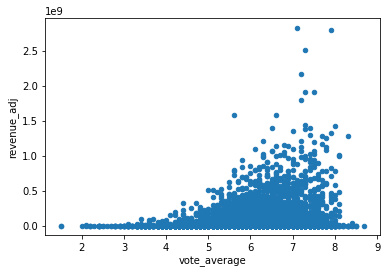

In [84]:
# scatter diagram to find correlation between vote_average and revenue_adj
plot_scatter('vote_average')

Although there seems to be a positive correlation between average vote and revenue as the former increases from 4 to 7. But, there is no change in revenue as average vote increases from 2 to 4. Also, revenue drops significantly when the average vote is between 7 and 9. Overall, a correlation factor of 0.21 indicates that a high average vote does not necessarily translate to a higher revenue 

0.7040437098598166


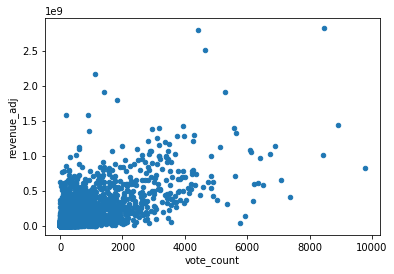

In [87]:
# scatter diagram to find correlation between vote_count and revenue_adj 
plot_scatter('vote_count')

Based on the scatter plot above, we can say that there is a positive correlation between vote_count and revenue_adj, indicated by a high correlation factor of 0.70. 

0.6064582914044462


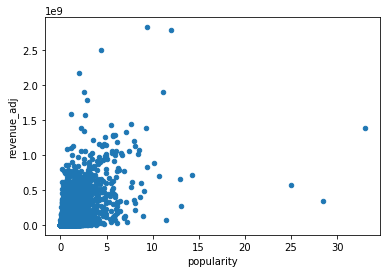

In [88]:
# scatter diagram to find correlation between popularity and revenue_adj 
plot_scatter('popularity')

Based on the scatter plot above, we can say that movies with higher popularity tend to have a higher revenue , indicated by a correlation factor of 0.60)

0.6408517264218061


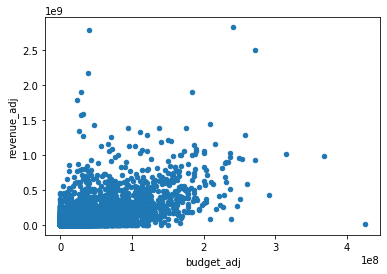

In [89]:
# scatter diagram to find correlation between budget_adj and revenue_adj 
plot_scatter('budget_adj')

Based on the scatter plot above we can say that the budget for a movie has a positive influence on the success of the movie, indicated by a correlation factor of 0.64

0.19830707393132618


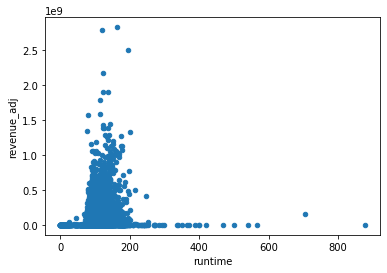

In [90]:
## scatter diagram to find correlation between runtime and revenue_adj 
plot_scatter('runtime')

Based on the scatter plot above, we can say that long runtime doesn't neessarily translate to the success of a movie

To summarise the charts above, following attributes are positively correlated with the success of the movie, in the decreasing order of significance:

1. vote_count (0.70)
2. budget_adj (0.64)
3. popularity (0.60)

### Which genres have been the most popular in the last 6 decades?
> I am going to follow these steps:
1. create new rows for each of the pipe delimited values in the "genres" column 
2. create new category variable called "decades" to divide the "release_year" into 6 groups
3. create separate dataframes for each of the decades, and plot the most popular genres for each of those decades

In [68]:
#creating a new dataframe for genres analysis, with a new row for each of the delimited values in the 'genres' column
df_genres = df.assign(genres=df['genres'].str.split('|')).explode('genres')

In [69]:
df_genres.shape

(24650, 12)

In [70]:
#Bin edges that will be used to "cut" the data into groups
bin_edges = [ 1960,1970 ,1980 ,1990 ,2000,2010,2020 ] 
bin_names = ['60s' ,'70s' ,'80s' ,'90s', '00s', '10s']

#adding a new column called 'decade' 
df_genres['decade'] = pd.cut(df_genres['release_year'], bin_edges, labels=bin_names)

df_genres.head(2)

,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,decade
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,10s
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,10s


In [71]:
#creating a new dataframe to extract the relevant fields from the df_genres dataframe
df_genres_decades=df_genres.groupby(['decade','genres'])[['vote_count']].count().reset_index()
df_genres_decades.rename(columns={"vote_count":"genres_count"}, inplace=True)
df_genres_decades.head(5)

,decade,genres,genres_count
0,60s,Action,78
1,60s,Adventure,64
2,60s,Animation,15
3,60s,Comedy,112
4,60s,Crime,45


In [110]:
# creating a function that takes string (name of the decade) and dataframe (data for a given decade) variable as inputs and plots the bar chart
def plot_bar(dec, df_gen_dec):
    ax= df_gen_dec.plot.bar(x='genres', y='genres_count', figsize=(15,4))
    ax.set_xlabel(dec+" "+"genres");
    ax.set_ylabel("Number of movies made");

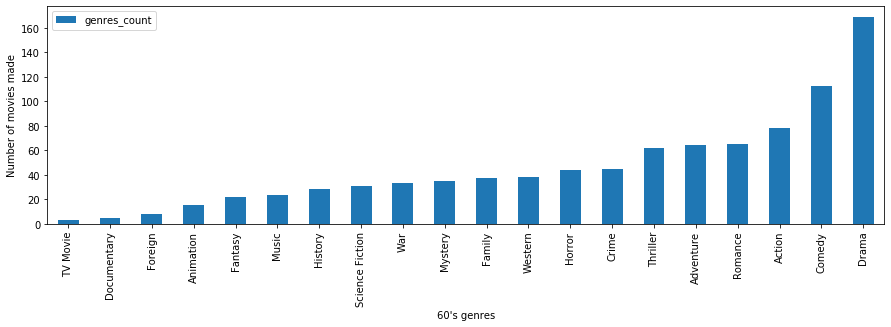

In [111]:
#extracting 60's decade into a separate dataframe, in order to analyze the most popular genres for that decade
df_genres_60s= df_genres_decades[df_genres_decades['decade']=="60s"].sort_values('genres_count')

# calling the plot_bar function created above to create the bar chart for 60's movies 
plot_bar('60\'s', df_genres_60s)

We can see from the bar chart above that the 3 most popular movie genres in 60's were:
1. Drama
2. Comedy
3. Action

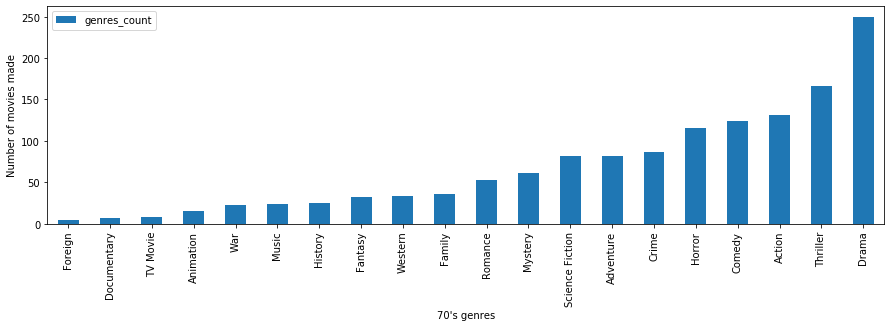

In [112]:
#extracting 70's decade into a separate dataframe, in order to analyze the most popular genres for that decade
df_genres_70s= df_genres_decades[df_genres_decades['decade']=="70s"].sort_values('genres_count')

# calling the plot_bar function created above to create the bar chart for 70's movies 
plot_bar('70\'s', df_genres_70s)

We can see from the bar chart above that the 3 most popular movie genres in 70's were:
1. Drama
2. Thriller
3. Action

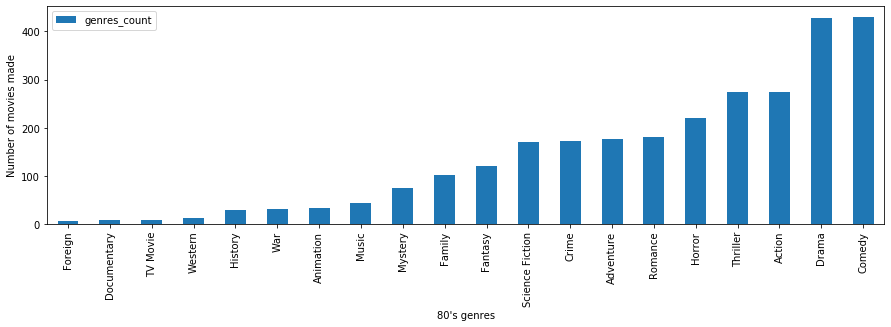

In [113]:
#extracting 80's decade into a separate dataframe, in order to analyze the most popular genres for that decade
df_genres_80s= df_genres_decades[df_genres_decades['decade']=="80s"].sort_values('genres_count')

# calling the plot_bar function created above to create the bar chart for 80's movies 
plot_bar('80\'s', df_genres_80s)

We can see from the bar chart above that the 3 most popular movie genres in 80's were:
1. Comedy
2. Drama
3. Action

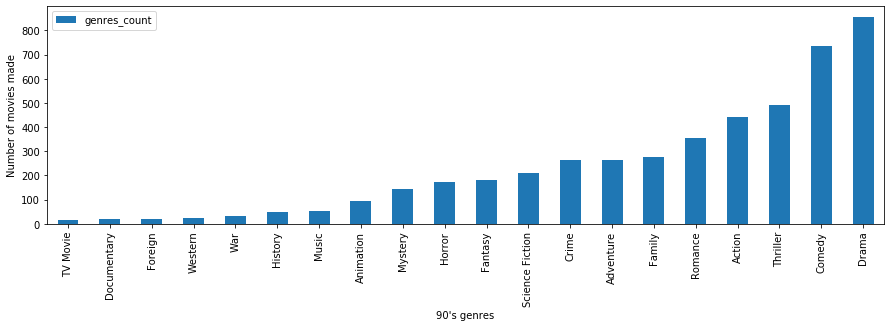

In [114]:
#extracting 90's decade into a separate dataframe, in order to analyze the most popular genres for that decade
df_genres_90s= df_genres_decades[df_genres_decades['decade']=="90s"].sort_values('genres_count')

# calling the plot_bar function created above to create the bar chart for 90's movies 
plot_bar('90\'s', df_genres_90s)

We can see from the bar chart above that the 3 most popular movie genres in 90's were:
1. Drama
2. Comedy
3. Thriller

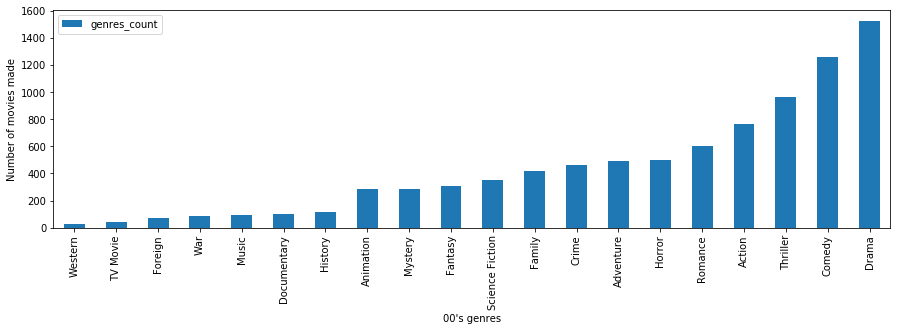

In [117]:
#extracting 00's decade into a separate dataframe, in order to analyze the most popular genres for that decade
df_genres_00s= df_genres_decades[df_genres_decades['decade']=="00s"].sort_values('genres_count')

# calling the plot_bar function created above to create the bar chart for 00's movies 
plot_bar('00\'s', df_genres_00s)

We can see from the bar chart above that the 3 most popular movie genres in 00's were:
1. Drama
2. Comedy
3. Thriller

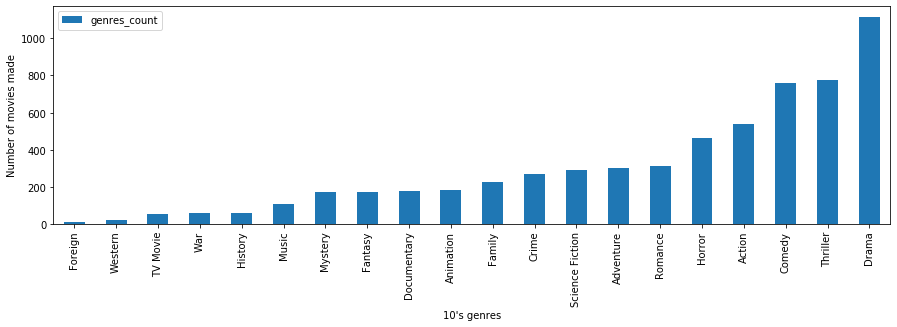

In [118]:
#extracting 10's decade into a separate dataframe, in order to analyze the most popular genres for that decade
df_genres_10s= df_genres_decades[df_genres_decades['decade']=="10s"].sort_values('genres_count')

# calling the plot_bar function created above to create the bar chart for 10's movies 
plot_bar('10\'s', df_genres_10s)

We can see from the bar chart above that the 3 most popular movie genres in 10's were:
1. Drama
2. Thriller
3. Comedy

<a id='conclusions'></a>
## Conclusions

> Based on the analysis above, we can answer the questions we set out to answer:
1. **What factors can help predict the revenue for a movie:** vote_count (corr=0.70), budget_adj (corr=0.64), popularity (corr=0.60)
2. **Which genres have been the most popular in the last 6 decades**: Drama, Comedy, Thriller

**Limitations:**
There are a few limitations with the analysis I have presented above, the key ones being:
1. The revenue and budget fields do not have an associated currency with them. If there are movies from other countries with different currencies, we can't compare those movies based on revenue or budget.There needs to be a normalisation to ensure those values are represented in a common currency
2. We have seen earlier that there were rows with missing values, which were dropped. The dropped rows could have an influence on the conclusions presented here
3. I have only examined the quantitative variables (vote_average, vote_count, popularity, budget_adj and runtime) on how they influence the success of a movie. There are other qualitative variables in the dataset (cast, director, production_companies) that could have a bigger impact on the success of a movie 

**Appendix:**
Websites used for completing the project:
1. pandas.pydata.org
2. Stack overflow
3. Quora
